## Navier-Stokes Characteristic Boundary Conditions (NSCBC)

In [1]:
from sympy import *
init_printing(use_unicode=True)

### Conserved variables
We start with the Euler equations in conservation-law form, with the vector of conserved variables $U$ and primitive variables $q$. Then we compute the $P$ matrix ($P_{ij} = \partial U_i / \partial q_j$) and the $Q_x$, $Q_y$, and $Q_z$ matrices ($Q_{k,ij} = \partial F_{k,i} / \partial q_j$, where $F_k$ is the flux vector in the $k$ direction) (Sutherland and Kennedy, 2002).

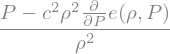

In [2]:
# define symbols
rho = Symbol('rho', positive=True) # density
p = Symbol('P', positive=True) # pressure
u = Symbol('u') # normal velocity
v = Symbol('v') # transverse velocity
w = Symbol('w') # transverse velocity
s = Symbol('s') # passive scalar
c = Symbol('c') # sound speed
e = Function('e')(rho, p) # specific internal energy

E = rho*e + rho*(u**2 + v**2 + w**2)/2 # total energy density

# (this is needed to rewrite the thermodynamic derivatives in terms of the sound speed)
de_drho = solveset(Eq(c**2, (p - rho**2 * Derivative(e, rho)) / (rho**2 * Derivative(e,p))), Derivative(e, rho)).args[0]
de_drho

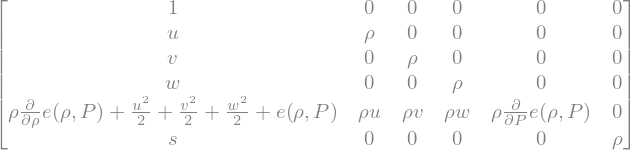

In [3]:
# compute the P matrix from Sutherland and Kennedy (2003)
U = Matrix([rho, rho*u, rho*v, rho*w, E, rho*s])
q = Matrix([rho, u, v, w, p, s])
P = simplify(Matrix(BlockMatrix(Derivative(U, q, evaluate=True).T)).T)
P

In [4]:
# compute the Q_n matrix
F_n = Matrix([rho*u,  # flux vector in normal direction
            rho*u**2 + p,
            rho*v*u,
            rho*w*u,
            (E + p)*u,
            rho*s*u])
Q_n = simplify(Matrix(BlockMatrix(Derivative(F_n, q, evaluate=True).T)).T)

In [5]:
# compute the Q_t1 matrix
F_t1 = Matrix([rho*v,
              rho*u*v,
              rho*v**2 + p,
              rho*w*v,
              (E + p)*v,
              rho*s*v])
Q_t1 = simplify(Matrix(BlockMatrix(Derivative(F_t1, q, evaluate=True).T)).T)

In [6]:
# compute the Q_t2 matrix
F_t2 = Matrix([rho*w,
               rho*u*w,
               rho*v*w,
               rho*w**2 + p,
               (E + p)*w,
               rho*s*w])
Q_t2 = simplify(Matrix(BlockMatrix(Derivative(F_t2, q, evaluate=True).T)).T)


### Primitive variables
Now we compute the coefficient matrices $A_x$, $A_y$, and $A_z$ for the primitive equations ($A = P^{-1} Q$):

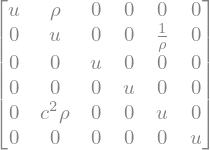

In [7]:
# compute the A_n matrix from Sutherland and Kennedy (2003)
# (this is the primitive variable flux matrix in the normal direction)
A_n = simplify(Inverse(P) * Q_n).subs(Derivative(e,rho), de_drho)
A_n

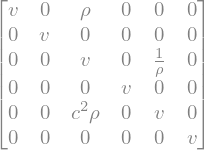

In [8]:
# compute the A_t1 matrix
A_t1 = simplify(Inverse(P) * Q_t1).subs(Derivative(e,rho), de_drho)
A_t1

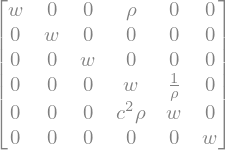

In [9]:
# compute the A_t2 matrix
A_t2 = simplify(Inverse(P) * Q_t2).subs(Derivative(e,rho), de_drho)
A_t2

### Characteristic variables
We compute the eigenvalues $\lambda$ and eigenvectors $S$ of the $A_x$ matrix.

Then we compute the vector $\mathcal{L} = \lambda S^{-1} \frac{dq}{dx}$ and the transverse vectors $\mathcal{T}_y = S^{-1} A_y \frac{dq}{dy}$ and $\mathcal{T}_z = S^{-1} A_z \frac{dq}{dz}$.

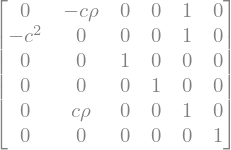

In [10]:
# compute the eigenvector matrix S
c = Symbol('c')
rho = Symbol('rho')
lambda_list = [eval for (eval, n, es) in A_n.left_eigenvects()]
Sinv_list = [[ev for ev in es] for (v, n, es) in A_n.left_eigenvects()]
Sinv = Matrix([Sinv_list[1][0],  Sinv_list[0][2], Sinv_list[0][0], Sinv_list[0][1], Sinv_list[2][0], Sinv_list[0][3]])
Sinv

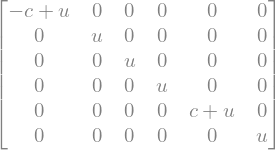

In [11]:
# compute eigenvalue matrix \lambda
lambda_waves = diag(lambda_list[1], lambda_list[0], lambda_list[0], lambda_list[0], lambda_list[2], lambda_list[0])
lambda_waves

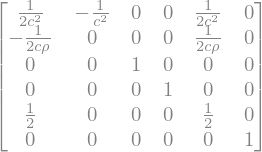

In [12]:
# compute S
S = Sinv.inv()
S

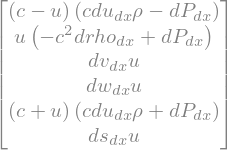

In [13]:
# compute the \mathcal{L} vector

#drho_dx = Symbol(r'\frac{d\rho}{dx}')
#du_dx = Symbol(r'\frac{du}{dx}')
#dv_dx = Symbol(r'\frac{dv}{dx}')
#dw_dx = Symbol(r'\frac{dw}{dx}')
#dp_dx = Symbol(r'\frac{dP}{dx}')
#ds_dx = Symbol(r'\frac{ds}{dx}')

drho_dx = Symbol('drho_dx')
du_dx = Symbol('du_dx')
dv_dx = Symbol('dv_dx')
dw_dx = Symbol('dw_dx')
dp_dx = Symbol('dP_dx')
ds_dx = Symbol('ds_dx')

dQ_dx_def = Matrix([drho_dx, du_dx, dv_dx, dw_dx, dp_dx, ds_dx])
L = simplify(lambda_waves * Sinv * dQ_dx_def)
L

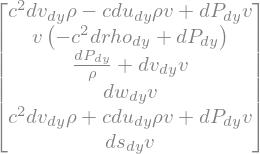

In [14]:
# compute the y-transverse terms

#drho_dy = Symbol(r'\frac{d\rho}{dy}')
#du_dy = Symbol(r'\frac{du}{dy}')
#dv_dy = Symbol(r'\frac{dv}{dy}')
#dw_dy = Symbol(r'\frac{dw}{dy}')
#dp_dy = Symbol(r'\frac{dP}{dy}')
#ds_dy = Symbol(r'\frac{ds}{dy}')

drho_dy = Symbol('drho_dy')
du_dy = Symbol('du_dy')
dv_dy = Symbol('dv_dy')
dw_dy = Symbol('dw_dy')
dp_dy = Symbol('dP_dy')
ds_dy = Symbol('ds_dy')

dq_dy_def = Matrix([drho_dy, du_dy, dv_dy, dw_dy, dp_dy, ds_dy])
T_1 = simplify(Sinv * A_t1 * dq_dy_def)
T_1

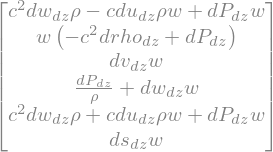

In [15]:
# compute the z-transverse terms

#drho_dz = Symbol(r'\frac{d\rho}{dz}')
#du_dz = Symbol(r'\frac{du}{dz}')
#dv_dz = Symbol(r'\frac{dv}{dz}')
#dw_dz = Symbol(r'\frac{dw}{dz}')
#dp_dz = Symbol(r'\frac{dP}{dz}')
#ds_dz = Symbol(r'\frac{ds}{dz}')

drho_dz = Symbol('drho_dz')
du_dz = Symbol('du_dz')
dv_dz = Symbol('dv_dz')
dw_dz = Symbol('dw_dz')
dp_dz = Symbol('dP_dz')
ds_dz = Symbol('ds_dz')

dq_dz_def = Matrix([drho_dz, du_dz, dv_dz, dw_dz, dp_dz, ds_dz])
T_2 = simplify(Sinv * A_t2 * dq_dz_def)
T_2

### x1 Upper Outflow
We replace the $\mathcal{L}_0$ component with a relaxation term for a specified pressure at the outflow boundary to obtain $\mathcal{\tilde L}$, and then compute ${d\tilde Q}/{dx} = S \lambda^{-1} \mathcal{\tilde L}$.

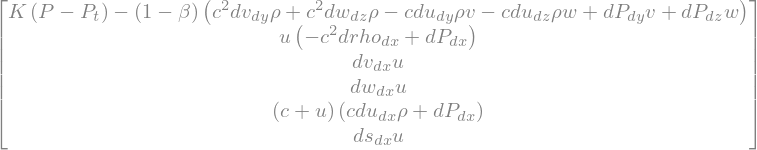

In [16]:
K = Symbol('K')
p = Symbol('P')
p_t = Symbol('P_t')
beta = Symbol('beta')
v = Symbol('v')
dp_dy = Symbol('dP_dy')
du_dy = Symbol('du_dy')
gamma = Symbol('gamma')
dv_dy = Symbol('dv_dy')

T_phi = simplify(T_1[0] + T_2[0])
L_outflow_x1_upper = Matrix([K*(p - p_t) - (1 - beta)*T_phi, L[1], L[2], L[3], L[4], L[5]])
L_outflow_x1_upper

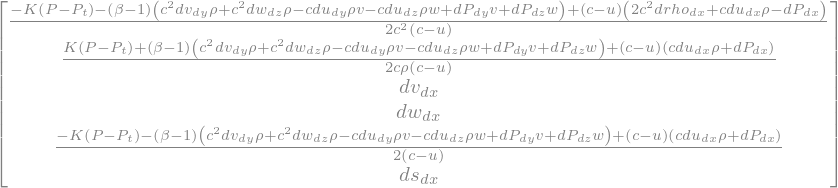

In [17]:
dQ_dx_outflow_x1_upper = simplify(S * Inverse(lambda_waves) * L_outflow_x1_upper)
dQ_dx_outflow_x1_upper

In [18]:
drho_dx = Symbol('drho_dx')
du_dx = Symbol('du_dx')
dv_dx = Symbol('dv_dx')
dw_dx = Symbol('dw_dx')
dp_dx = Symbol('dP_dx')
ds_dx = Symbol('ds_dx')
dQ_dx_def = Matrix([drho_dx, du_dx, dv_dx, dw_dx, dp_dx, ds_dx])
L = simplify(lambda_waves * Sinv * dQ_dx_def)

T_phi = simplify(T_1[0] + T_2[0])
L_outflow_x1_upper = Matrix([K*(p - p_t) - (1 - beta)*T_phi, L[1], L[2], L[3], L[4], L[5]])
dQ_dx_outflow_x1_upper = simplify(S * Inverse(lambda_waves) * L_outflow_x1_upper)

common_exprs_upper, final_expr_upper = cse(dQ_dx_outflow_x1_upper, list=False)
for var, val in common_exprs_upper:
    print(cxxcode(val, assign_to=var))
print(cxxcode(final_expr_upper, assign_to='dQ_dx'))

x0 = std::pow(c, 2);
x1 = c - u;
x2 = c*rho;
x3 = du_dx*x2;
x4 = rho*x0;
x5 = K*(P - P_t) + (beta - 1)*(dP_dy*v + dP_dz*w - du_dy*v*x2 - du_dz*w*x2 + dv_dy*x4 + dw_dz*x4);
x6 = (1.0/2.0)/x1;
x7 = dP_dx + x3;
dQ_dx[0] = x6*(x1*(-dP_dx + 2*drho_dx*x0 + x3) - x5)/x0;
dQ_dx[1] = x6*(x1*x7 + x5)/(c*rho);
dQ_dx[2] = dv_dx;
dQ_dx[3] = dw_dx;
dQ_dx[4] = x6*(x1*x7 - x5);
dQ_dx[5] = ds_dx;


### x1 Lower Outflow
We replace the $\mathcal{L}_4$ component with a relaxation term for a specified pressure at the outflow boundary to obtain $\mathcal{\tilde L}$, and then compute ${d\tilde Q}/{dx} = S \lambda^{-1} \mathcal{\tilde L}$.

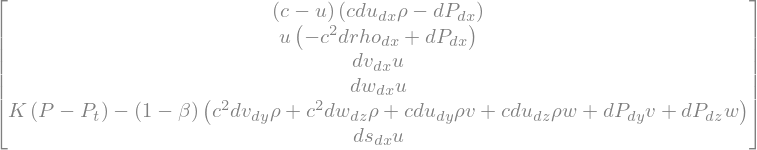

In [19]:
K = Symbol('K')
p = Symbol('P')
p_t = Symbol('P_t')
beta = Symbol('beta')
v = Symbol('v')
dp_dy = Symbol('dP_dy')
du_dy = Symbol('du_dy')
gamma = Symbol('gamma')
dv_dy = Symbol('dv_dy')

T_phi = simplify(T_1[4] + T_2[4])
L_outflow_x1_lower = Matrix([L[0], L[1], L[2], L[3], K*(p - p_t) - (1 - beta)*T_phi, L[5]])
L_outflow_x1_lower

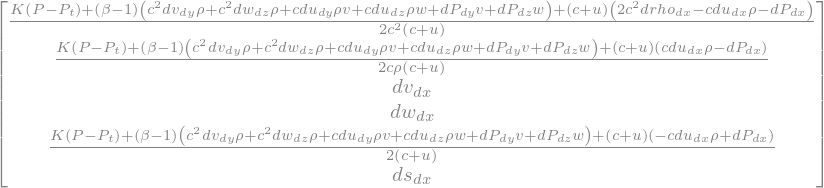

In [20]:
dQ_dx_outflow_x1_lower = simplify(S * Inverse(lambda_waves) * L_outflow_x1_lower)
dQ_dx_outflow_x1_lower

In [21]:
drho_dx = Symbol('drho_dx')
du_dx = Symbol('du_dx')
dv_dx = Symbol('dv_dx')
dw_dx = Symbol('dw_dx')
dp_dx = Symbol('dP_dx')
ds_dx = Symbol('ds_dx')
dQ_dx_def = Matrix([drho_dx, du_dx, dv_dx, dw_dx, dp_dx, ds_dx])
L = simplify(lambda_waves * Sinv * dQ_dx_def)

T_phi = simplify(T_1[4] + T_2[4])
L_outflow_x1_lower = Matrix([L[0], L[1], L[2], L[3], K*(p - p_t) - (1 - beta)*T_phi, L[5]])
dQ_dx_outflow_x1_lower = simplify(S * Inverse(lambda_waves) * L_outflow_x1_lower)

common_exprs_lower, final_expr_lower = cse(dQ_dx_outflow_x1_lower, list=False)
for var, val in common_exprs_lower:
    print(cxxcode(val, assign_to=var))
print(cxxcode(final_expr_lower, assign_to='dQ_dx'))

x0 = std::pow(c, 2);
x1 = c + u;
x2 = c*rho;
x3 = du_dx*x2;
x4 = rho*x0;
x5 = K*(P - P_t) + (beta - 1)*(dP_dy*v + dP_dz*w + du_dy*v*x2 + du_dz*w*x2 + dv_dy*x4 + dw_dz*x4);
x6 = (1.0/2.0)/x1;
x7 = -dP_dx + x3;
dQ_dx[0] = x6*(x1*(-dP_dx + 2*drho_dx*x0 - x3) + x5)/x0;
dQ_dx[1] = x6*(x1*x7 + x5)/(c*rho);
dQ_dx[2] = dv_dx;
dQ_dx[3] = dw_dx;
dQ_dx[4] = x6*(-x1*x7 + x5);
dQ_dx[5] = ds_dx;
